In [3]:
%matplotlib inline

import sys
sys.path.append('/home/psapir/prog/msm/lib')
from simlib import *
import numpy as np
from scipy.stats import linregress

import matplotlib
import matplotlib.pyplot as plt

In [9]:
def set_params(max_t, dt, x0, N, b, D):
    g = gaussian(A = np.array([1]),
                 M = np.array([0]),
                 S = np.array([1]))
    U = potential([g])
    return {
    'name': 'equilibrium_test',
    'num_steps': int(max_t/dt),
    'num_dim': 1,
    'num_particles': N,
    'KBT': 1/b,
    'Ddt': D*dt,
    'x0': np.ones(N) * x0,
    'potential': U
    }

# Changing beta

In [3]:
# Params
x0 = 1.5
dt = 0.01
D = 1.0
k = 1.0
max_t = 10
ts = np.arange(0, max_t, dt)
num_steps = ts.shape[0]

# Theory
#mean_theory = x0 * np.exp(-1*D*b*k*ts)
#var_theory = 1/(b*k) * (1-np.exp(-2*b*k*D*ts))

In [10]:
betas = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
#Ds = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
means = np.zeros((num_steps, len(betas)))
vars  = np.zeros((num_steps, len(betas)))
for i, b in enumerate(betas):
    params = set_params(max_t, dt, x0, 5000, b, D)
    xs = simulate(params, notebook=True)
    num_steps = ts.shape[0]
    for t, _ in enumerate(ts):
        means[t, i] = np.mean(xs[t,0,:])
        vars[t, i] = np.var(xs[t,0,:])

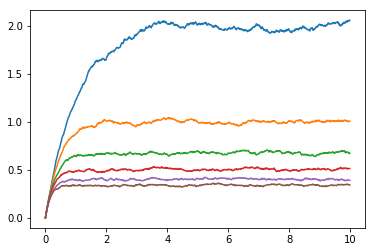

In [12]:
#plt.plot(ts, means)
plt.plot(ts, vars)

In [13]:
with open('data/ou.data', 'w') as f:
    for t, ms, vs in zip(ts, means, vars):
        m = ' '.join(map(str, ms))
        v = ' '.join(map(str, vs))
        f.write('{} {} {}\n'.format(t, m, v))

# Changing D

In [282]:
# Params
x0 = 1.5
dt = 0.01
b = 5.0
k = 1.0
max_t = 1
ts = np.arange(0, max_t, dt)
num_steps = ts.shape[0]

In [283]:
Ds = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
means = np.zeros((num_steps, len(betas)))
vars  = np.zeros((num_steps, len(betas)))
for i, D in enumerate(Ds):
    params = set_params(max_t, dt, x0, 5000, b, D)
    xs = simulate(params, notebook=True)
    num_steps = ts.shape[0]
    for t, _ in enumerate(ts):
        means[t, i] = np.mean(xs[t,0,:])
        vars[t, i] = np.var(xs[t,0,:])

5.0


5.0


5.0


5.0


5.0


5.0


In [284]:
with open('data/ou_D.data', 'w') as f:
    for t, ms, vs in zip(ts, means, vars):
        m = ' '.join(map(str, ms))
        v = ' '.join(map(str, vs))
        f.write('{} {} {}\n'.format(t, m, v))

# RMSD

In [4]:
from sklearn.metrics import mean_squared_error

In [7]:
g = gaussian(A = np.array([1]),
             M = np.array([0]),
             S = np.array([1]))
U = potential([g])

In [77]:
#Ns = np.array([10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000])
Ns = np.array([10, 50, 100, 500, 1000, 5000, 10000])
num_steps = 500
parameters = {
    'name': 'OU_RMSD',
    'num_steps': num_steps,
    'num_dim': 1,
    'num_particles': 1,
    'KBT': 1,
    'Ddt': 0.01,
    'x0': 1.5, 
    'potential': U
}

In [78]:
means_sim = np.zeros((Ns.shape[0], num_steps))
vars_sim = np.zeros((Ns.shape[0], num_steps))

In [79]:
def kinetics(x0, k, num_steps):
    ts = np.arange(0, num_steps*0.01, 0.01)
    mean = x0 * np.exp(-k*ts)
    var = 1/k * (1-exp(-2*k*ts))
    return ts, mean, var

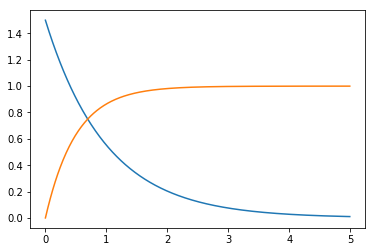

In [80]:
ts, mean, var = kinetics(1.5, 1, num_steps)
plt.plot(ts, mean)
plt.plot(ts, var)

In [81]:
for i, N in enumerate(Ns):
    parameters['num_particles'] = N
    xs = simulate(params=parameters, notebook=True).reshape((num_steps, N))
    means_sim[i] = np.mean(xs, axis=1)
    vars_sim[i] = np.var(xs, axis=1)

In [83]:
RMSD_means = np.zeros(Ns.shape[0])
RMSD_vars  = np.zeros(Ns.shape[0])
for i in range(Ns.shape[0]):
    RMSD_means[i] = mean_squared_error(means_sim[i], mean)
    RMSD_vars[i] = mean_squared_error(vars_sim[i], var)

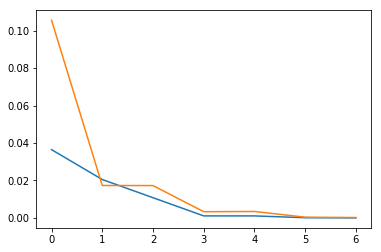

In [85]:
plt.plot(RMSD_means)
plt.plot(RMSD_vars)